In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import numpy as np
import pandas as pd
import sklearn
import unicodedata
import numpy as np
import random
import re
import nltk
from nltk.corpus import movie_reviews
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
import transformers

from transformers import BertTokenizer, TFBertForSequenceClassification

In [4]:
train_df = pd.read_csv("/content/sentiment-analysis-dataset/train.csv",encoding= 'unicode_escape')
train_df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [5]:
train_df.isna()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
27476,False,False,False,False,False,False,False,False,False,False
27477,False,False,False,False,False,False,False,False,False,False
27478,False,False,False,False,False,False,False,False,False,False
27479,False,False,False,False,False,False,False,False,False,False


In [6]:
train_df['sentiment'].value_counts()

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

In [7]:
test_df = pd.read_csv("/content/sentiment-analysis-dataset/test.csv",encoding= 'unicode_escape')
test_df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [8]:
test_df['sentiment'].value_counts()

neutral     1430
positive    1103
negative    1001
Name: sentiment, dtype: int64

In [12]:
test_df = test_df.dropna()

In [22]:
test_df.isna()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
3529,False,False,False,False,False,False,False,False,False
3530,False,False,False,False,False,False,False,False,False
3531,False,False,False,False,False,False,False,False,False
3532,False,False,False,False,False,False,False,False,False


In [14]:
train_df.sentiment.replace("positive", 1, inplace=True)
train_df.sentiment.replace("negative", 0, inplace=True)
train_df.sentiment.replace("neutral", 2, inplace=True)

In [15]:
test_df.sentiment.replace("positive", 1, inplace=True)
test_df.sentiment.replace("negative", 0, inplace=True)
test_df.sentiment.replace("neutral", 2, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [16]:
test_df

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,2,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,1,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",0,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,1,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,1,noon,60-70,Angola,32866272.0,1246700.0,26.0
...,...,...,...,...,...,...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",0,noon,21-30,Nicaragua,6624554.0,120340.0,55.0
3530,416863ce47,All alone in this old house again. Thanks for...,1,night,31-45,Niger,24206644.0,1266700.0,19.0
3531,6332da480c,I know what you mean. My little dog is sinkin...,0,morning,46-60,Nigeria,206139589.0,910770.0,226.0
3532,df1baec676,_sutra what is your next youtube video gonna b...,1,noon,60-70,North Korea,25778816.0,120410.0,214.0


In [17]:
num_classes = 3

bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case=True)

In [18]:
sent = "A wonderful woman!"
tokens = bert_tokenizer.tokenize(sent)
print(tokens)

['a', 'wonderful', 'woman', '!']


In [19]:
tokenized_sequence = bert_tokenizer.encode_plus(sent,
                                                add_special_tokens=True,
                                                max_length=10,
                                                padding='max_length',
                                                truncation=True,
                                                return_attention_mask=True)

In [20]:
tokenized_sequence

{'input_ids': [101, 1037, 6919, 2450, 999, 102, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 0, 0, 0, 0]}

In [21]:
bert_tokenizer.decode(
    tokenized_sequence['input_ids'],
    clean_up_tokenization_spaces=False,
)

'[CLS] a wonderful woman ! [SEP] [PAD] [PAD] [PAD] [PAD]'

In [24]:
train_labels = train_df['sentiment']
test_labels = test_df['sentiment']

In [25]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [26]:
def convert_example_to_feature(review):
  return bert_tokenizer.encode_plus(review, 
                add_special_tokens = True,     # add [CLS], [SEP]
                max_length = 512,              # max length of the text that can go to BERT
                padding='max_length',
                truncation=True,
                return_attention_mask = True,  # add attention mask to not focus on pad tokens
              )

In [27]:
# map to the expected input to TFBertForSequenceClassification
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,
      "token_type_ids": token_type_ids,
      "attention_mask": attention_masks,
  }, label

def encode_examples(ds):
  # prepare list, so that we can build up final TensorFlow dataset from slices.
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []
  for review, label in ds:
    bert_input = convert_example_to_feature(review)
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])

  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)


In [29]:
train_text = train_df['text']
train_text = train_text.astype('str').to_list()

In [32]:
test_text = test_df['text']
test_text = test_text.astype('str').to_list()

In [33]:
batch_size = 8
# train dataset
ds_train = zip(train_text, y_train)
ds_test = zip(test_text, y_test)
ds_train_encoded = encode_examples(ds_train).shuffle(len(train_text)).batch(batch_size)
ds_test_encoded = encode_examples(ds_test).batch(batch_size)

In [34]:
# log_dir = './sentiment-analysis-using-bert-keras/tensorboard_data/tb_bert'
model_save_path = './sentiment-analysis-using-bert-keras/models/bert_model.h5'

path = "./sentiment-analysis-using-bert-keras/models/"

## Initialize pre-built BERT-based classifier from transformers
bert_model = TFBertForSequenceClassification.from_pretrained(
    'bert-base-uncased', num_labels=num_classes)

bert_model.summary()

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 109,484,547
Trainable params: 109,484,547
Non-trainable params: 0
_________________________________________________________________


In [35]:
learning_rate = 2e-5
# multiple epochs might be better as long as we will not overfit the model
number_of_epochs = 4

# choosing Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)
# we do not have one-hot vectors, we can use sparce categorical cross entropy and accuracy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

bert_model.compile(loss=loss,
                   optimizer=optimizer,
                   metrics=metric)

In [36]:
history = bert_model.fit(ds_train_encoded,
                         batch_size=batch_size,
                         epochs=number_of_epochs,
                         validation_data=ds_test_encoded)

Epoch 1/4
3436/3436 [==============================] - 2137s 608ms/step - loss: 0.5731 - accuracy: 0.7638 - val_loss: 0.5092 - val_accuracy: 0.7917
Epoch 2/4
3436/3436 [==============================] - 2087s 607ms/step - loss: 0.4031 - accuracy: 0.8425 - val_loss: 0.5312 - val_accuracy: 0.7917
Epoch 3/4
3436/3436 [==============================] - 2087s 607ms/step - loss: 0.2562 - accuracy: 0.9042 - val_loss: 0.6265 - val_accuracy: 0.7838
Epoch 4/4
3436/3436 [==============================] - 2087s 607ms/step - loss: 0.1537 - accuracy: 0.9458 - val_loss: 0.7577 - val_accuracy: 0.7776


In [37]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

matplotlib.rcParams['figure.dpi'] = 150


# Plotting results
def plot1(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)
    ## Accuracy plot
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    ## Loss plot
    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()


def plot2(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    #plt.gca().set_ylim(0,1)
    plt.show()

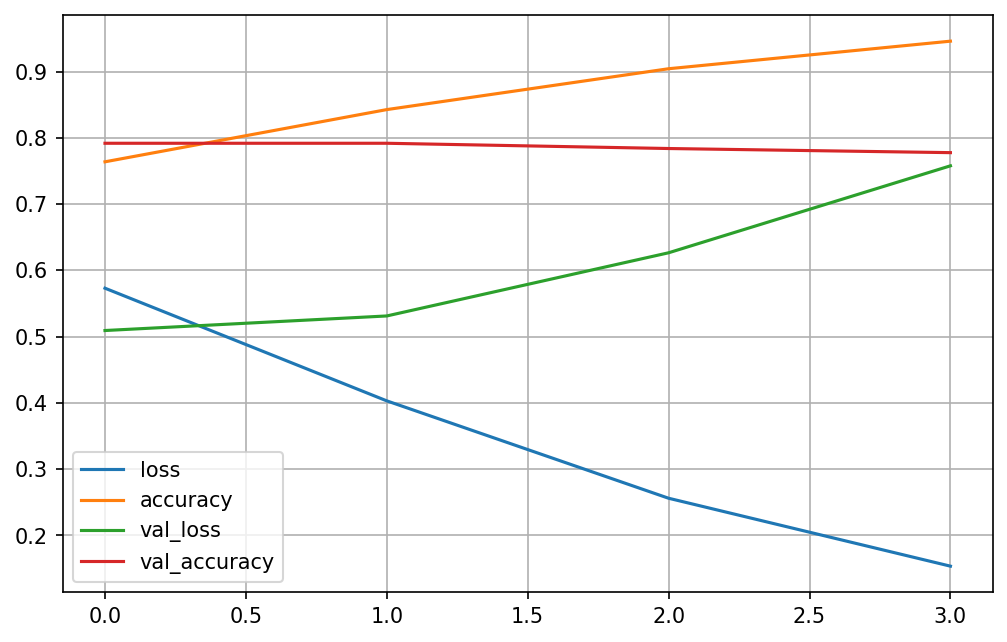

In [38]:
plot2(history)

In [39]:
bert_model.evaluate(ds_test_encoded,
                    batch_size=batch_size)

442/442 [==============================] - 89s 202ms/step - loss: 0.7577 - accuracy: 0.7776


[0.7577115297317505, 0.7775891423225403]

In [40]:
y_test_pred = bert_model.predict(ds_test_encoded,
                                 batch_size=batch_size)

442/442 [==============================] - 91s 198ms/step


In [41]:
y_test_pred_class = y_test_pred[0].argmax(axis=1)

In [106]:
print(y_test_pred_class[:10])
print(y_test[:10])

[2 1 0 1 1 1 0 0 2 2]
[2. 1. 0. 1. 1. 1. 0. 0. 2. 2.]


In [43]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
confusion_matrix(y_test,y_test_pred_class)

array([[ 822,   26,  153],
       [  29,  895,  179],
       [ 247,  152, 1031]])

In [45]:
classification_report(y_test,y_test_pred_class)

'              precision    recall  f1-score   support\n\n           0       0.75      0.82      0.78      1001\n           1       0.83      0.81      0.82      1103\n           2       0.76      0.72      0.74      1430\n\n    accuracy                           0.78      3534\n   macro avg       0.78      0.78      0.78      3534\nweighted avg       0.78      0.78      0.78      3534\n'